In [ ]:
import os


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('final_cars_datasets_edited_rev01.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   price               2318 non-null   int64 
 1   mark                2318 non-null   object
 2   model               2318 non-null   object
 3   year                2318 non-null   int64 
 4   year_from_register  2318 non-null   int64 
 5   mileage             2318 non-null   int64 
 6   engine_capacity     2318 non-null   int64 
 7   transmission        2318 non-null   object
 8   drive               2318 non-null   object
 9   hand_drive          2318 non-null   object
 10  fuel type           2318 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 199.3+ KB


In [ ]:
df.describe()

,price,year,year_from_register,mileage,engine_capacity,fuel type
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,16.027610,100013.194996,1507.010785,1.020276
std,288.673112,3.698863,3.698863,52512.478883,549.585170,0.211910
min,80.000000,1979.000000,7.000000,2000.000000,9.000000,1.000000
25%,776.000000,2004.000000,13.000000,67000.000000,1300.000000,1.000000
50%,1000.000000,2006.000000,16.000000,94000.000000,1490.000000,1.000000
75%,1213.000000,2009.000000,18.000000,124000.000000,1800.000000,1.000000
max,1400.000000,2015.000000,43.000000,790000.000000,12340.000000,5.000000


In [ ]:
df.shape

(2318, 11)

In [ ]:
df.mark.unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

Search for duplicate

In [ ]:
df.loc[df.duplicated()]

,price,mark,model,year,year_from_register,mileage,engine_capacity,transmission,drive,hand_drive,fuel type


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


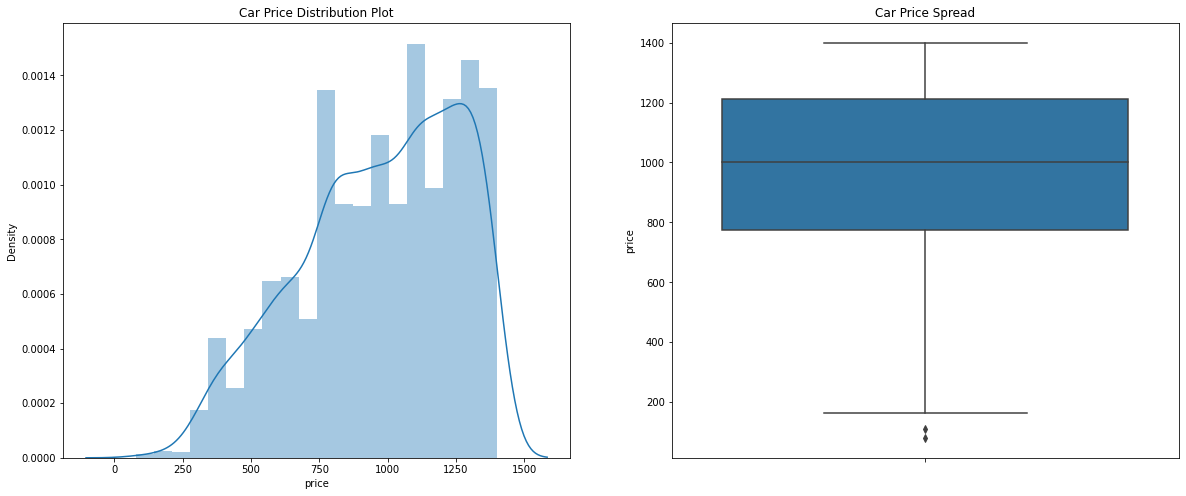

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [ ]:
df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    2318.000000
mean      971.522433
std       288.673112
min        80.000000
25%       776.000000
50%      1000.000000
75%      1213.000000
85%      1300.000000
90%      1320.000000
100%     1400.000000
max      1400.000000
Name: price, dtype: float64

inference:
1. The plot seemed to be left-skewed, meaning that the most prices in the dataset are high(above 1,000 USD).
2. There is no significant difference between the mean and the median of the price distribution.
3. The data points does not spread out much from the mean, which indicates a low variance in the car prices.(50% of the prices are below 1,000, whereas the remaining 50% are between 1,000 and 1,400.)

Visualizing the categorical data:
1. mark
2. model
3. transmission
4. drive
5. hand drive

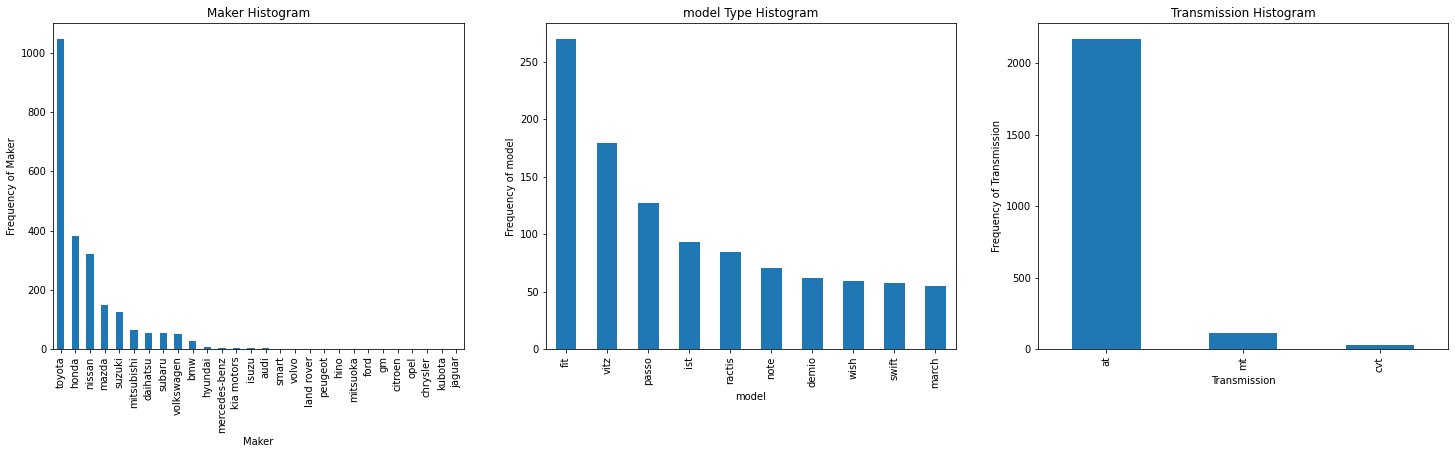

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.mark.value_counts().plot(kind='bar')
plt.title('Maker Histogram')
plt1.set(xlabel = 'Maker', ylabel='Frequency of Maker')

plt.subplot(1,3,2)
plt1 = df.model.value_counts().head(10).plot(kind='bar')
plt.title('model Type Histogram')
plt1.set(xlabel = 'model', ylabel='Frequency of model')

plt.subplot(1,3,3)
plt1 = df.transmission.value_counts().plot(kind='bar')
plt.title('Transmission Histogram')
plt1.set(xlabel = 'Transmission', ylabel='Frequency of Transmission')

plt.show()

inference:
1. Toyota seemed to be top on sale maker.
2. fit is the top model on sale.
3. 'at' or automatic transmission is the top transmission.

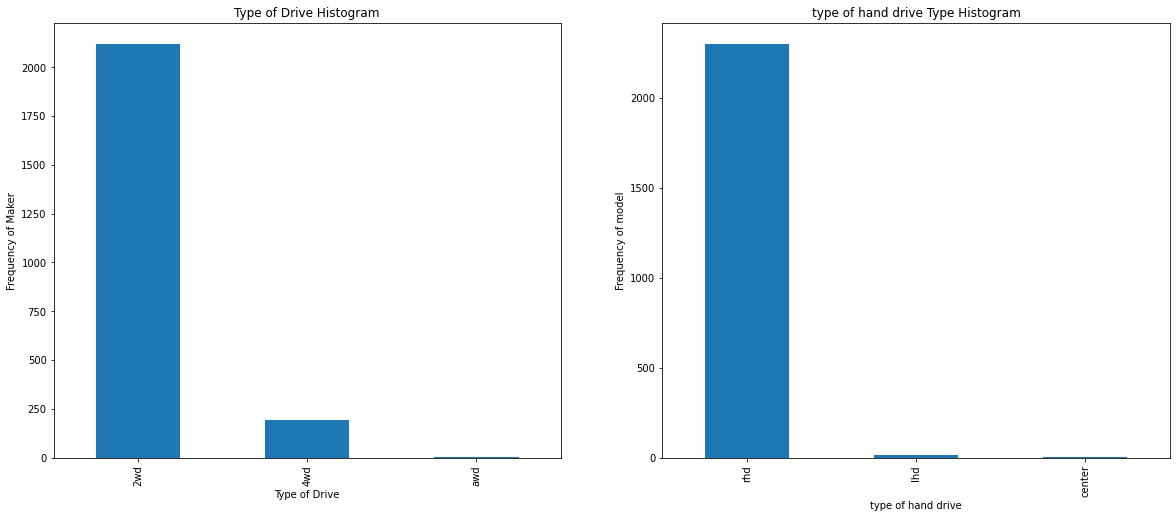

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt1 = df.drive.value_counts().plot(kind='bar')
plt.title('Type of Drive Histogram')
plt1.set(xlabel = 'Type of Drive', ylabel='Frequency of Maker')

plt.subplot(1,2,2)
plt1 = df.hand_drive.value_counts().plot(kind='bar')
plt.title('type of hand drive Type Histogram')
plt1.set(xlabel = 'type of hand drive', ylabel='Frequency of model')

plt.show()

inference:
1. '2wd' or 2-wheel drive is the top on sale type of drive
2. 'rnd' or rand hand drive is the top on sale type of hand drive


Visualising numerical data

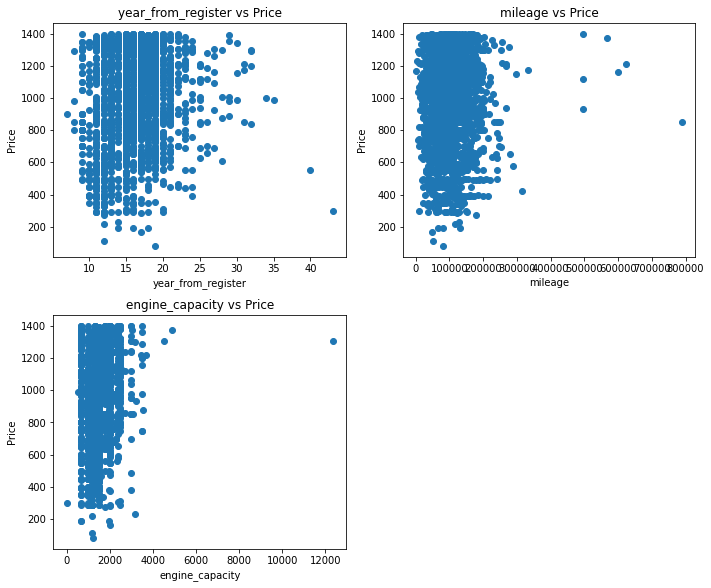

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('year_from_register', 1)
scatter('mileage', 2)
scatter('engine_capacity', 3)


plt.tight_layout()

inference:
1. year_from_register and mileage seems to have a correlation with price. the data point tend to cluster around the lower bracket, meaning a lower year and mileage tends to have higher price.

List of significant variables after Visual analysis :
1. maker
2. model
3. transmission
4. Drive
5. hand drive
6. year from registration
7. mileage
8. engine capacity


In [ ]:
df.columns

Index(['price', 'mark', 'model', 'year', 'year_from_register', 'mileage',
       'engine_capacity', 'transmission', 'drive', 'hand_drive', 'fuel type'],
      dtype='object')

In [ ]:
df_lr = df[['price','mark','model','year_from_register','mileage','engine_capacity','transmission','drive','hand_drive']]

In [ ]:
df_lr.head(10)

,price,mark,model,year_from_register,mileage,engine_capacity,transmission,drive,hand_drive
0,80,nissan,march,19,80000,1240,at,2wd,rhd
1,110,nissan,march,12,53000,1200,at,2wd,rhd
2,165,nissan,lafesta,17,47690,2000,at,2wd,rhd
3,190,toyota,avensis,14,130661,1990,at,2wd,rhd
4,190,daihatsu,mira,16,66300,660,at,2wd,rhd
5,190,daihatsu,mira,18,81400,660,at,2wd,rhd
6,220,nissan,march,12,117000,1200,at,2wd,rhd
7,230,volkswagen,passat,14,127763,3190,at,4wd,rhd
8,275,mazda,bongo van,12,178218,1800,mt,2wd,rhd
9,283,honda,step wgn,17,121655,2000,at,2wd,rhd


In [ ]:
#sns.pairplot(df_lr)
#plt.show()

Apply Dummy Variable for Categorical

In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df_lr = dummies('mark',df_lr)
df_lr = dummies('model',df_lr)
df_lr = dummies('transmission',df_lr)
df_lr = dummies('drive',df_lr)
df_lr = dummies('hand_drive',df_lr)

In [ ]:
df_lr.head(10)

,price,year_from_register,mileage,engine_capacity,bmw,chrysler,citroen,daihatsu,ford,gm,...,x-type,xsara picasso,z,zest,cvt,mt,4wd,awd,lhd,rhd
0,80,19,80000,1240,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,110,12,53000,1200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,165,17,47690,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,190,14,130661,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,190,16,66300,660,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,190,18,81400,660,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,220,12,117000,1200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,230,14,127763,3190,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,275,12,178218,1800,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,283,17,121655,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_lr.shape

(2318, 294)

Train-Test Split and feature scaling

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['year_from_register','mileage','engine_capacity','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,year_from_register,mileage,engine_capacity,bmw,chrysler,citroen,daihatsu,ford,gm,...,x-type,xsara picasso,z,zest,cvt,mt,4wd,awd,lhd,rhd
731,0.565891,0.269231,0.128328,0.081266,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
789,0.573643,0.153846,0.140612,0.072712,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1229,0.720930,0.307692,0.137124,0.071856,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,0.456589,0.153846,0.136171,0.055603,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1614,0.829457,0.307692,0.090301,0.054748,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train.describe()

,price,year_from_register,mileage,engine_capacity,bmw,chrysler,citroen,daihatsu,ford,gm,...,x-type,xsara picasso,z,zest,cvt,mt,4wd,awd,lhd,rhd
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.00000,1622.000000,1622.000000,...,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000
mean,0.669594,0.308214,0.165411,0.072952,0.012947,0.000617,0.000617,0.02836,0.000617,0.000617,...,0.000617,0.000617,0.000617,0.000617,0.014180,0.049938,0.079531,0.002466,0.007398,0.992602
std,0.221867,0.140566,0.082738,0.048386,0.113081,0.024830,0.024830,0.16605,0.024830,0.024830,...,0.024830,0.024830,0.024830,0.024830,0.118269,0.217885,0.270650,0.049614,0.085721,0.085721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.527132,0.192308,0.110368,0.055603,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.697674,0.307692,0.157191,0.071856,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.855039,0.384615,0.206104,0.098375,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train_corr = df_train.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_train_corr[abs(df_train_corr) > 0.1].sort_values(ascending=False)
print("There is {} correlated values with Price:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 correlated values with Price:
price                 1.000000
year_from_register    0.234837
engine_capacity       0.169312
toyota                0.163033
ist                   0.142728
march                -0.178592
cube                 -0.185938
passo                -0.186434
note                 -0.201892
nissan               -0.248633
Name: price, dtype: float64


Model building


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, step = 10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year_from_register', False, 16),
 ('mileage', False, 16),
 ('engine_capacity', False, 14),
 ('bmw', True, 1),
 ('chrysler', False, 8),
 ('citroen', False, 5),
 ('daihatsu', False, 9),
 ('ford', False, 11),
 ('gm', False, 4),
 ('hino', True, 1),
 ('honda', True, 1),
 ('hyundai', False, 8),
 ('isuzu', False, 6),
 ('jaguar', True, 1),
 ('kia motors', False, 11),
 ('kubota', True, 1),
 ('land rover', False, 10),
 ('mazda', True, 1),
 ('mercedes-benz', False, 4),
 ('mitsubishi', False, 6),
 ('mitsuoka', True, 1),
 ('nissan', True, 1),
 ('opel', False, 5),
 ('peugeot', True, 1),
 ('smart', False, 2),
 ('subaru', True, 1),
 ('suzuki', True, 1),
 ('toyota', False, 14),
 ('volkswagen', True, 1),
 ('volvo', False, 14),
 ('207', True, 1),
 ('3 series', False, 15),
 ('307', True, 1),
 ('a-class', False, 14),
 ('a4', True, 1),
 ('a4 avant', True, 1),
 ('accord', False, 7),
 ('acty truck', False, 6),
 ('acty van', False, 6),
 ('ad', True, 1),
 ('ad expert', True, 1),
 ('ad van', True, 1),
 ('aeri

In [ ]:
X_train.columns[rfe.support_]

Index(['bmw', 'hino', 'honda', 'jaguar', 'kubota', 'mazda', 'mitsuoka',
       'nissan', 'peugeot', 'subaru',
       ...
       'vanette van', 'visto', 'vitz', 'voltz', 'voxy', 'wingroad', 'wish',
       'x-trail', 'x-type', 'xsara picasso'],
      dtype='object', length=146)

Building model using statsmodel, for the detailed statistics

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,bmw,hino,honda,jaguar,kubota,mazda,mitsuoka,nissan,peugeot,subaru,...,vanette van,visto,vitz,voltz,voxy,wingroad,wish,x-trail,x-type,xsara picasso
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def pvalue(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.pvalues['const']) # model summary


def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Model 1

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5.920
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.99e-69
Time:                        00:56:18   Log-Likelihood:                 478.71
No. Observations:                1622   AIC:                            -695.4
Df Residuals:                    1491   BIC:                             10.86
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5150      0.014     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


any variable that has a p-value greater than 0.05 will be dropped.

In [ ]:
highvalue01=pd.read_csv('highpvalue_01.csv')
highvalue = highvalue01['value'].tolist()


In [ ]:
X_train_new = X_train_rfe.drop(highvalue, axis = 1)

Model 2

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     9.523
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.18e-78
Time:                        00:56:30   Log-Likelihood:                 427.50
No. Observations:                1622   AIC:                            -715.0
Df Residuals:                    1552   BIC:                            -337.6
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5383      0.013     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
highvalue02=pd.read_csv('highpvalue_02.csv')
highvalue = highvalue02['value'].tolist()

In [ ]:
X_train_new = X_train_new.drop(highvalue, axis = 1)

Model 3

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     10.03
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           5.04e-77
Time:                        00:56:48   Log-Likelihood:                 417.26
No. Observations:                1622   AIC:                            -706.5
Df Residuals:                    1558   BIC:                            -361.5
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5501      0.012     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
highvalue03=pd.read_csv('highpvalue_03.csv')
highvalue = highvalue03['value'].tolist()

In [ ]:
X_train_new = X_train_new.drop(highvalue, axis = 1)

Model 4

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.94e-76
Time:                        00:58:50   Log-Likelihood:                 406.01
No. Observations:                1622   AIC:                            -696.0
Df Residuals:                    1564   BIC:                            -383.3
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5606      0.012     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_new = X_train_new.drop(['ad','move latte'], axis = 1)

Model 5

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     10.70
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.26e-75
Time:                        01:00:13   Log-Likelihood:                 404.13
No. Observations:                1622   AIC:                            -694.3
Df Residuals:                    1565   BIC:                            -386.9
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5621      0.012     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_new = X_train_new.drop(['mitsuoka','corolla fielder'], axis = 1)

Model 6

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.15e-75
Time:                        01:01:31   Log-Likelihood:                 402.15
No. Observations:                1622   AIC:                            -692.3
Df Residuals:                    1566   BIC:                            -390.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5635      0.012     46.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
checkVIF(X_train_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
57,x-type,inf
4,jaguar,inf
2,hino,inf
24,dutro,inf
0,const,6.34
6,nissan,2.85
8,suzuki,2.13
48,swift,1.88
3,honda,1.71
38,note,1.47


In [ ]:
X_train_new = X_train_new.drop(['x-type'], axis = 1)

Model 6

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.15e-75
Time:                        01:04:49   Log-Likelihood:                 402.15
No. Observations:                1622   AIC:                            -692.3
Df Residuals:                    1566   BIC:                            -390.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5635      0.012     46.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
checkVIF(X_train_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,hino,inf
24,dutro,inf
0,const,6.34
6,nissan,2.85
8,suzuki,2.13
48,swift,1.88
3,honda,1.71
38,note,1.47
22,cube,1.41
53,vitz,1.37


In [ ]:
X_train_new = X_train_new.drop(['dutro'], axis = 1)

Model 7

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.15e-75
Time:                        01:05:41   Log-Likelihood:                 402.15
No. Observations:                1622   AIC:                            -692.3
Df Residuals:                    1566   BIC:                            -390.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5635      0.012     46.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,6.34
6,nissan,2.85
8,suzuki,2.13
47,swift,1.88
3,honda,1.71
37,note,1.47
22,cube,1.41
52,vitz,1.37
32,march,1.34
5,mazda,1.30


Residual Analysis of Model

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

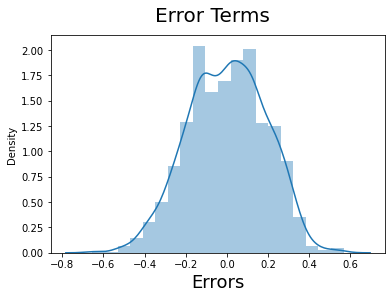

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Prediction and Evaluation

In [ ]:
#Scaling the test set
num_vars = ['year_from_register','mileage','engine_capacity','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.13383717918259241

Text(0, 0.5, 'y_pred')

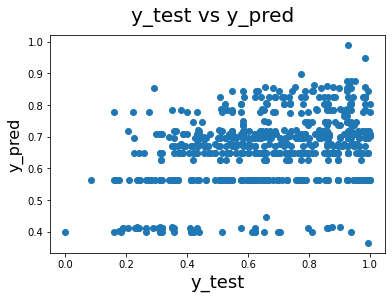

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Evaluation of the model using Statistics

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.15e-75
Time:                        01:11:21   Log-Likelihood:                 402.15
No. Observations:                1622   AIC:                            -692.3
Df Residuals:                    1566   BIC:                            -390.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5635      0.012     46.

Inference :
1. R-sqaured and Adjusted R-squared (extent of fit) -  0.275 and 0.250 
2. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

3. However a lower R^2 value indicates the independent variable is not explaining much in the variation of your price. 

present independent variable:
-mark
-model
-transmission
-drive
-hand drive

4. suggesting to include additional independent variable to the dataset:

-car body
-wheelbase
-car length
-car width
-car height
-curb weight
-engine type
-bore ratio
-stroke 
-horsepower